# Section

In [1]:
from pint import UnitRegistry
import sympy
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
from IPython.display import display

In [2]:
sys.path.append('./')
from Section import Section

initialization

In [3]:
ureg = UnitRegistry()
sympy.init_printing()

Define sympy parameters

In [4]:
A, A0, t, t0, a, b, h, L = sympy.symbols('A A_0 t t_0 a b h L')

define graph

In [5]:
stringers = {1:[(sympy.Integer(0),h),A],
             2:[(a/2,h),A0],
             3:[(a,h),A],
             4:[(a-b,sympy.Integer(0)),A],
             5:[(b,sympy.Integer(0)),A]}

panels = {(1,2):t,
          (2,3):t,
          (3,4):t,
          (4,5):t,
          (5,1):t}

In [6]:
S1 = Section(stringers, panels)

In [7]:
S1.symmetry

[{'edges': [((1, 2), (2, 3)), ((1, 5), (3, 4)), (4, 5)],
  'nodes': [(1, 3), (2, 2), (4, 5)]},
 {'edges': [], 'nodes': []}]

In [8]:
values = [(A, 150 * ureg.millimeter**2),(A0, 250  * ureg.millimeter**2),(a, 80 * ureg.millimeter), \
          (b, 20 * ureg.millimeter),(h, 200 * ureg.millimeter),(L, 2000 * ureg.millimeter)]
datav = [(v[0],v[1].magnitude) for v in values]

In [9]:
positions={ii: S1.g.node[ii]['pos'].subs(datav) for ii in S1.g.nodes() }

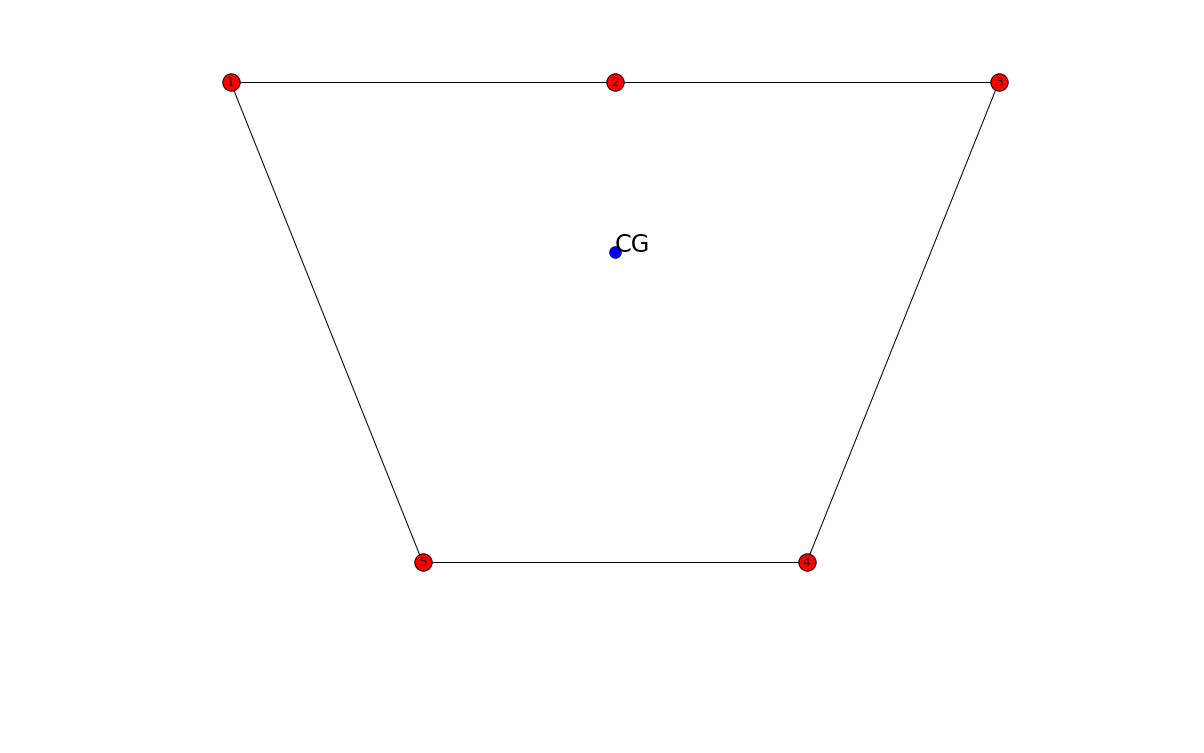

In [30]:
plt.figure(figsize=(16,10),dpi=300)
nx.draw(S1.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12)
plt.text(0,0, 'CG', fontsize=24);

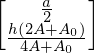

In [20]:
S1.cg

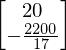

In [19]:
S1.g.node[4]['pos'].subs(datav)